**1) Install and load the latest versions of TensorFlow and Keras. Print their versions.**

In [49]:
# pip install tensorflow

In [1]:
import tensorflow as tf
import tensorflow.keras as t_keras
print(tf.__version__)


2.15.0


**2) Load the Wine Quality dataset and explore its dimensions.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
wine_data = pd.read_csv("wine.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


**3) Check for null values, identify categorical variables, and encode them.**

In [7]:
wine_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Data dosen't contain any null values.

In [8]:
## Categorical Features
categorical_features = wine_data.select_dtypes(include = ["object"]).columns

In [9]:
print(categorical_features)

Index(['quality'], dtype='object')


In [10]:
## Encode the categorical features
wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_features, drop_first=True)
wine_data_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**4) Separate the features and target variables from the dataset.**

In [11]:
X = wine_data_encoded.drop(["quality_good"], axis=1)
y = wine_data_encoded["quality_good"]

**5) Perform a train-test split, dividing the data into training, validation, and test datasets.**

In [12]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.35, random_state=42)

In [13]:
print("X_train_full:",X_train_full.shape)
print("X_test:",X_test.shape)
print("X_train:",X_train.shape)
print("X_valid:",X_valid.shape)

X_train_full: (1119, 11)
X_test: (480, 11)
X_train: (727, 11)
X_valid: (392, 11)


In [14]:
print("y_train_full:",y_train_full.shape)
print("y_test:",y_test.shape)
print("y_train:",y_train.shape)
print("y_valid:",y_valid.shape)

y_train_full: (1119,)
y_test: (480,)
y_train: (727,)
y_valid: (392,)


**6) Scale the dataset using an appropriate scaling technique.**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

**7) Design and implement at least two hidden layers and an output layer for the binary categorical variables.**

**8) Create a Sequential model in Keras and add the previously designed layers to it.**

**9) Print the summary of the model architecture.**

In [16]:
wine_model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(11,), name="input_layer"),
        tf.keras.layers.Dense(64, activation="relu", name="hidden_layer_1"),
        tf.keras.layers.Dense(32, activation="relu", name="hidden_layer_2"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
    ]
)

In [17]:
wine_model.layers

In [18]:
wine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 64)                768       
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**10) Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.**

In [19]:
LOSS_FUNCTION = "binary_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

**11) Compile the model with the specified loss function, optimizer, and metrics.**

In [20]:
wine_model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

**12) Fit the model to the training data using appropriate batch size and number of epochs.**

In [21]:
EPOCHS = 20
BATCH_SIZE = 30
VALIDATION_DATA = (X_valid, y_valid)
EARLY_STOPPING_CALLBACK = tf.keras.callbacks.EarlyStopping(patience=2)

history = wine_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=VALIDATION_DATA,
                        callbacks=[EARLY_STOPPING_CALLBACK])

Epoch 1/20


25/25 [==============================] - 2s 20ms/step - loss: 0.6808 - accuracy: 0.5805 - val_loss: 0.6268 - val_accuracy: 0.7015
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5796 - accuracy: 0.7345 - val_loss: 0.5710 - val_accuracy: 0.7321
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5267 - accuracy: 0.7538 - val_loss: 0.5505 - val_accuracy: 0.7321
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5026 - accuracy: 0.7552 - val_loss: 0.5470 - val_accuracy: 0.7296
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4894 - accuracy: 0.7552 - val_loss: 0.5462 - val_accuracy: 0.7449
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.7689 - val_loss: 0.5394 - val_accuracy: 0.7526
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7730 - val_loss: 0.5451 - val_accuracy: 0.7526
Epoch 8/20
25/25 

**13) Obtain the model's parameters (weights and biases).**

In [22]:
model_params = wine_model.get_weights()
for layer_param in model_params:
    print(layer_param.shape)

(11, 64)
(64,)
(64, 32)
(32,)
(32, 1)
(1,)


**14) Store the model's training history as a Pandas DataFrame.**

In [23]:
training_process = pd.DataFrame(history.history)
training_process

,loss,accuracy,val_loss,val_accuracy
0,0.680786,0.580468,0.626834,0.701531
1,0.579595,0.734525,0.571018,0.732143
2,0.526682,0.753783,0.550531,0.732143
3,0.502607,0.755158,0.546996,0.729592
4,0.489431,0.755158,0.546198,0.744898
5,0.484759,0.768913,0.539374,0.752551
6,0.475776,0.773040,0.545093,0.752551
7,0.468751,0.775791,0.540942,0.760204


**15) Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.**

<Axes: >

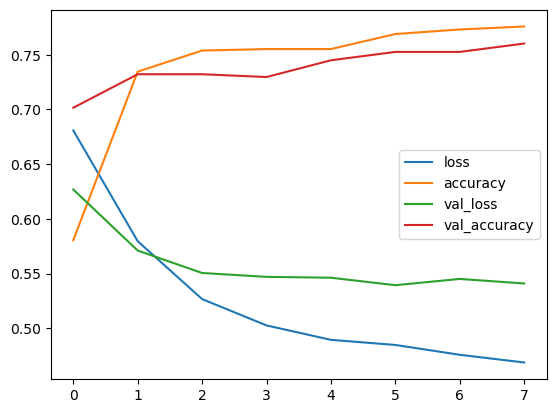

In [24]:
training_process.plot()

**16) Evaluate the model's performance using the test dataset and report relevant metrics.**

In [25]:
wine_model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.5360 - accuracy: 0.7292


[0.5359620451927185, 0.7291666865348816]